In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
colors_df = pd.read_csv('/content/data/colors.csv')
sets_df = pd.read_csv('/content/data/sets.csv')
themes_df = pd.read_csv('/content/data/themes.csv')

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products...

<img src="https://i.imgur.com/aKcwkSx.png">

A Lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many diferents sets.
<img src="/content/assets/lego_sets.png">

Text(0, 0.5, 'Number of Themes')

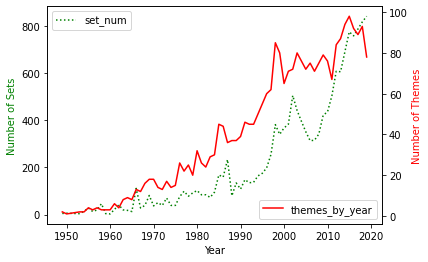

In [47]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace=True)
sets_by_year = sets_df.groupby('year').count()

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year['set_num'][:-2], 'g:')
ax2.plot(themes_by_year[:-2], color='r')

ax1.legend(['set_num'], loc=2)
ax2.legend(['themes_by_year'], loc='lower right')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='red')

In [26]:
sorted_parts_sets = sets_df.sort_values('num_parts', ascending=False)
sorted_parts_sets.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


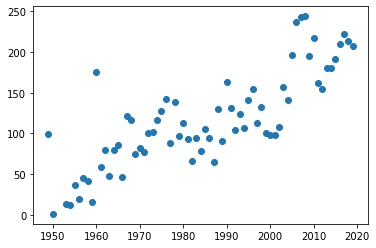

In [54]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

<img src="https://i.imgur.com/Sg4lcjx.png">

<BarContainer object of 10 artists>

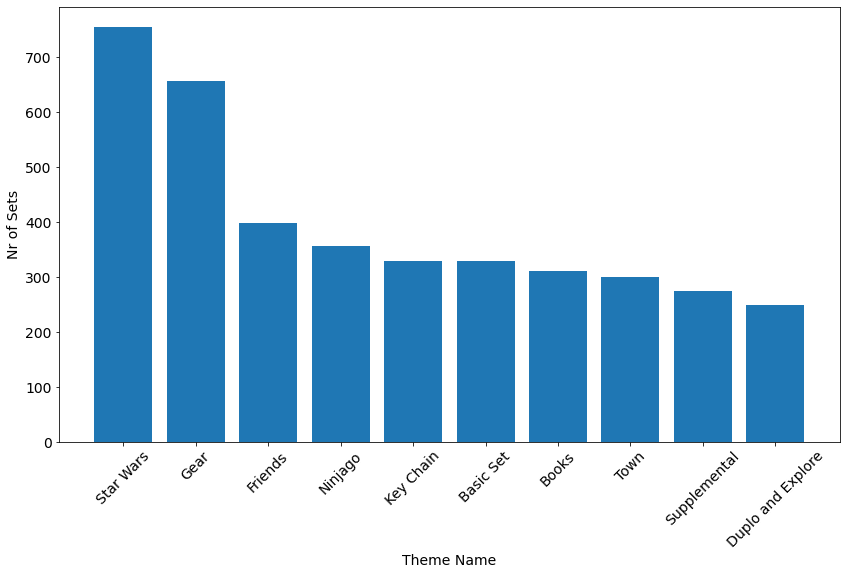

In [62]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
merged_df = pd.merge(set_theme_count, themes_df, on='id')

plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])